In [314]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import r2_score


In [315]:
df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [316]:
print("Most Expensive cut:",df.cut[df['price'].max()])
print("Most Expensive carat:",df.carat[df['price'].max()])
print("Most Expensive color:",df.color[df['price'].max()])
print("Most Expensive clarity:",df.clarity[df['price'].max()])

Most Expensive cut: Ideal
Most Expensive carat: 1.26
Most Expensive color: G
Most Expensive clarity: SI1


In [317]:
df.describe()


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [318]:
df.shape

(53940, 11)

<AxesSubplot:xlabel='y'>

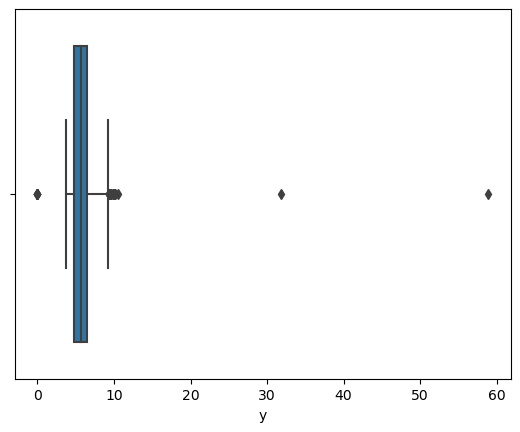

In [319]:
sns.boxplot(x=df['y'])

<AxesSubplot:xlabel='z'>

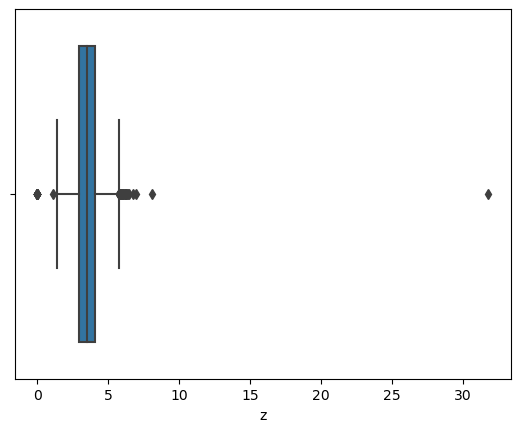

In [320]:
sns.boxplot(x=df['z'])

In [321]:
df = df[(df.z != 0) & (df.x != 0) & (df.y != 0)]
df1 = df[df.y < 30 ]
df1 = df1[df1.z < 30 ]
df1

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:xlabel='y'>

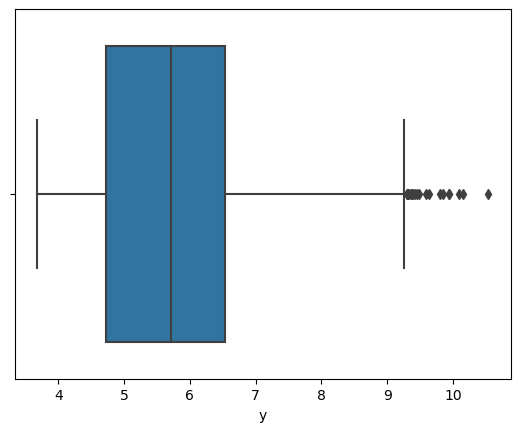

In [322]:
sns.boxplot(x=df1['y'])

<AxesSubplot:xlabel='z'>

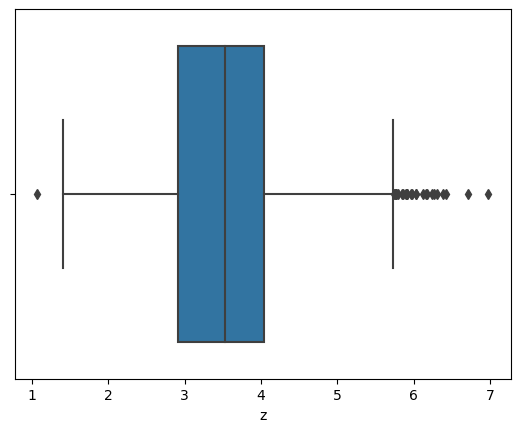

In [323]:
sns.boxplot(x=df1['z'])

In [324]:
df1.shape

(53917, 11)

<AxesSubplot:>

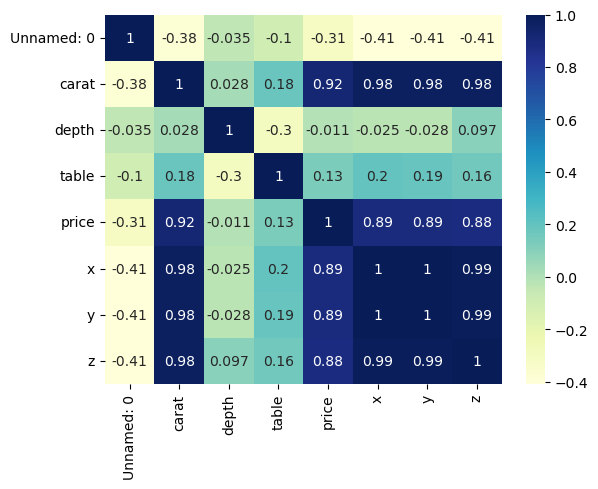

In [325]:
sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True,xticklabels=True)

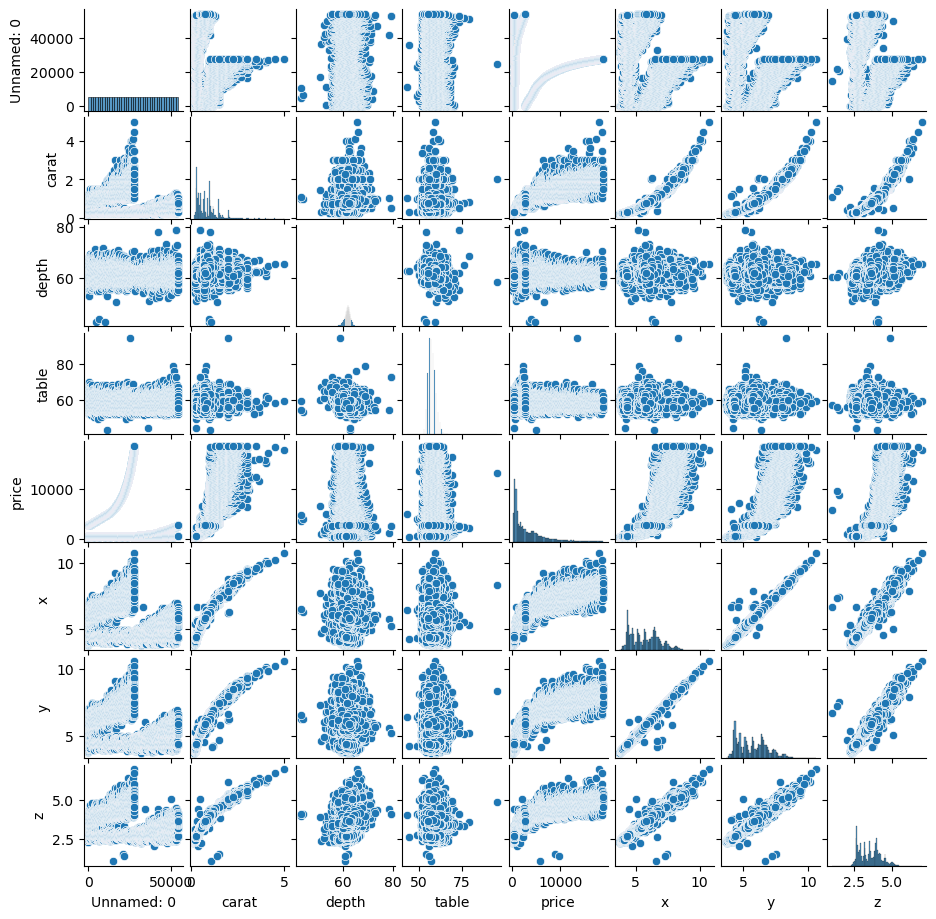

In [326]:
pair = sns.pairplot(df1)
pair.fig.set_size_inches(9,9)

In [327]:
print("Skewness:" ,df1['price'].skew()) 
print("Kurtosis:" ,df1['price'].kurt()) #No. of outlier over 3 is bad

Skewness: 1.618418680300224
Kurtosis: 2.1788063464957736


In [328]:
df1 = df1.drop(['Unnamed: 0','color','cut','clarity'],axis=1)
df1 = np.log(df1)

In [329]:
print("Skewness:" ,df1['price'].skew()) 
print("Kurtosis:" ,df1['price'].kurt()) #No. of outlier over 3 is b

Skewness: 0.11546017047276892
Kurtosis: -1.0970093214536945


In [330]:


from sklearn.linear_model import LinearRegression
X = df1.drop(['price','y','z'], axis=1)
y = df1['price']
X

,carat,depth,table,x
0,-1.469676,4.119037,4.007333,1.373716
1,-1.560648,4.091006,4.110874,1.358409
2,-1.469676,4.041295,4.174387,1.398717
3,-1.237874,4.133565,4.060443,1.435085
4,-1.171183,4.147885,4.060443,1.467874
...,...,...,...,...
53935,-0.328504,4.107590,4.043051,1.749200
53936,-0.328504,4.144721,4.007333,1.738710
53937,-0.356675,4.139955,4.094345,1.733424
53938,-0.150823,4.110874,4.060443,1.816452


In [331]:
lm = LinearRegression()

In [332]:
from sklearn.model_selection import train_test_split

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=49)


In [334]:
lm.fit(X_train,y_train)

LinearRegression()

In [335]:
print(r2_score(y_train, lm.predict(X_train)))
print(r2_score(y_test, lm.predict(X_test)))

0.9352646194385423
0.9351270108378842


In [336]:
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
beta_js

,Coefficient
carat,1.236637
depth,-1.053179
table,-0.953639
x,1.368736


In [337]:
slr = LinearRegression()

slr.fit(X_train[['carat']], y_train)

LinearRegression()

In [338]:
from sklearn.metrics import mean_squared_error 
import math
results_dict = {'Training MSE':
                    {
                        "SLR": mean_squared_error(y_train, slr.predict(X_train[['carat']])),
                        "MLR": mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": mean_squared_error(y_test, slr.predict(X_test[['carat']])),
                        "MLR": mean_squared_error(y_test, lm.predict(X_test)),
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(mean_squared_error(y_test, slr.predict(X_test[['carat']]))),
                        "MLR": math.sqrt(mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }
results_dict



{'Training MSE': {'SLR': 0.06873273808108755, 'MLR': 0.06650141214326855},
 'Test MSE': {'SLR': 0.06985640890215727, 'MLR': 0.067287005009898},
 'Test RMSE': {'SLR': 0.2643036301342781, 'MLR': 0.2593973882094768}}

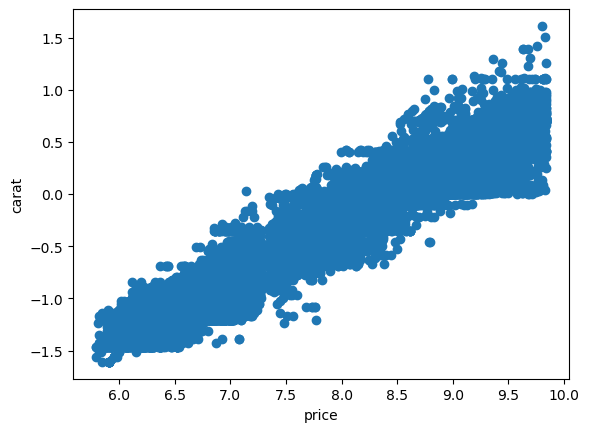

In [339]:
plt.scatter(df1['price'], df1['carat'])
plt.ylabel("carat")
plt.xlabel("price")
plt.show()

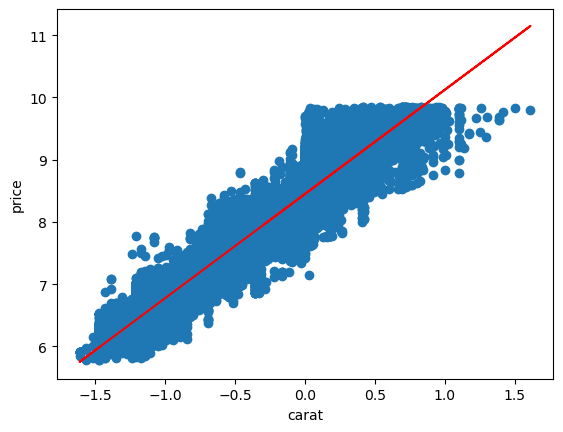

In [340]:
X = df1.carat.values
Y = df1.price.values

# Calculate x bar, y bar
x_bar = np.mean(X)
y_bar = np.mean(Y)

# Calculate slope
b = sum( (X-x_bar)*(Y-y_bar) ) / sum( (X-x_bar)**2 )

# Calculate intercept
a = y_bar - b*x_bar

def gen_y(x_list, a, b):
    y_gen = []
    for x_i in x_list:
        y_i = a + b*x_i
        y_gen.append(y_i)
    
    return(y_gen)

# Generate the values by invoking the 'gen_y' function
y_gen = gen_y(df1.carat,a,b)

plt.scatter(df1.carat, df1.price)  # Plot the original data
plt.plot(df1.carat, y_gen, color='red')
plt.ylabel("price")
plt.xlabel("carat")
plt.show()


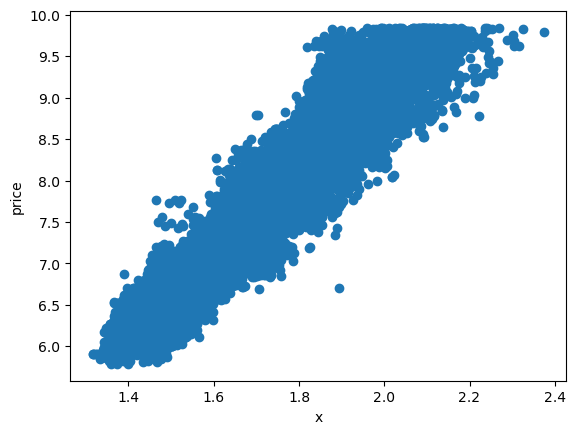

In [341]:
plt.scatter(df1['x'], df1['price'])
plt.ylabel("price")
plt.xlabel("x")
plt.show()

Slope = 5.059979780162368
Intercept = -0.9530811463536493


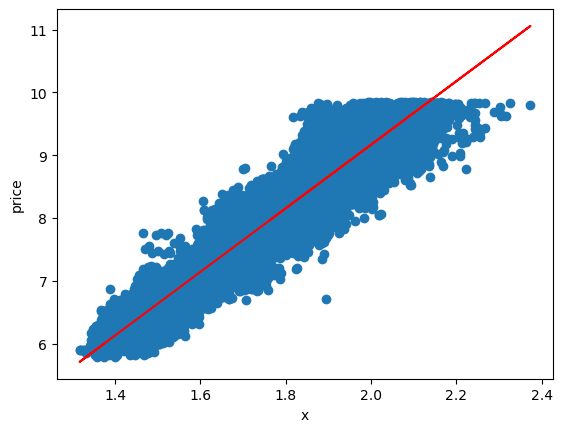

In [342]:
X = df1.x.values
Y = df1.price.values

# Calculate x bar, y bar
x_bar = np.mean(X)
y_bar = np.mean(Y)

# Calculate slope
b = sum( (X-x_bar)*(Y-y_bar) ) / sum( (X-x_bar)**2 )

# Calculate intercept
a = y_bar - b*x_bar

print("Slope = " + str(b))
print("Intercept = " + str(a))

def gen_y(x_list, a, b):
    y_gen = []
    for x_i in x_list:
        y_i = a + b*x_i
        y_gen.append(y_i)
    
    return(y_gen)

# Generate the values by invoking the 'gen_y' function
y_gen = gen_y(df1.x,a,b)
plt.scatter(df1.x, df1.price)  # Plot the original data
plt.plot(df1.x, y_gen, color='red')
plt.ylabel("price")
plt.xlabel("x")
plt.show()


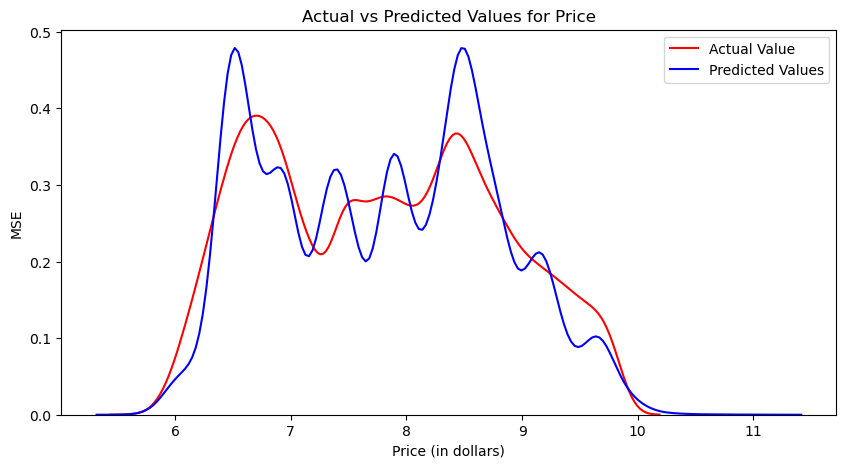

In [343]:
import warnings
width = 10
height = 5
warnings.filterwarnings('ignore')
Y_hat = lm.predict(X_train)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df1['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('MSE')
plt.legend()
plt.show()
plt.close()

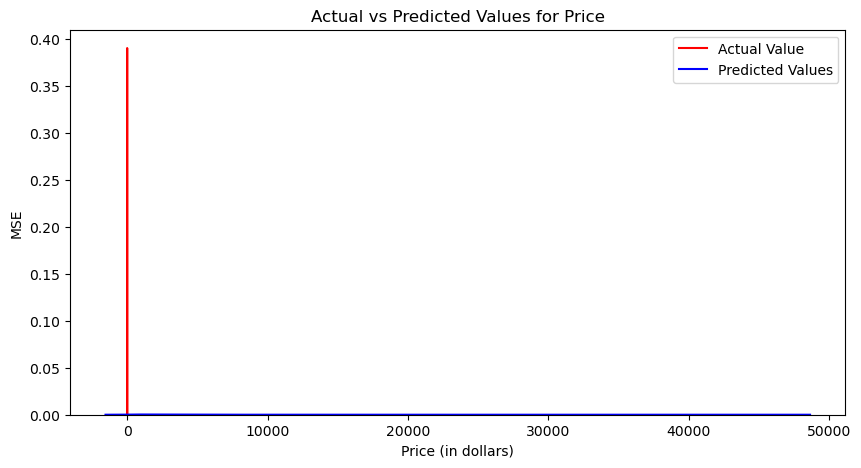

In [350]:
import warnings
warnings.filterwarnings('ignore')
Y_hat = lm.predict(X_test)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df1['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('MSE')
plt.legend()
plt.show()
plt.close()

In [345]:
import statsmodels.formula.api as sm
formula_str = df1.columns[0]+' ~ '+'+'.join(df1.columns[0:1]); formula_str
model=sm.ols(formula=formula_str, data=df1)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  carat   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.332e+32
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:21:14   Log-Likelihood:             1.6679e+06
No. Observations:               53917   AIC:                        -3.336e+06
Df Residuals:                   53915   BIC:                        -3.336e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.422e-15   4.62e-17     52.400      0.0

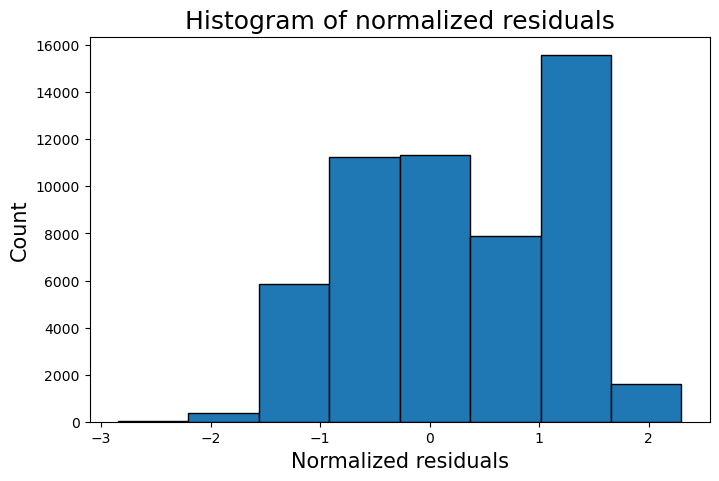

In [346]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

TypeError: plot got an unexpected keyword argument 'x'

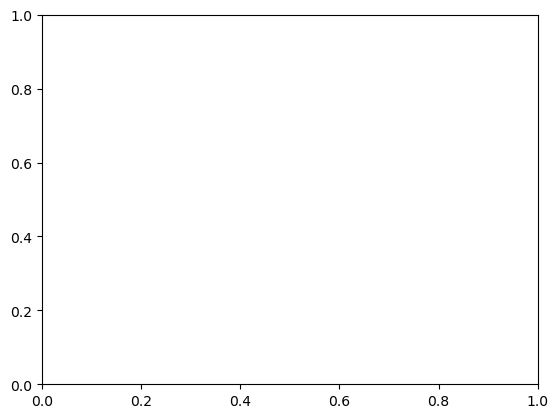

In [349]:
n = np.exp(lm.predict(X_train))
